In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from PIL import Image

In [3]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

In [4]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, 
                alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

In [5]:
def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, colorscale=colorscale, cdiscrete=cdiscrete, psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax

In [7]:
data=np.load("D:\Machine Learning/imag.pix.npy")
y=np.load("D:\Machine Learning/imag.lbl.npy")
STANDARD_SIZE = (322, 137)#standardized pixels in image.
data.shape, y.shape

((87L, 132342L), (87L,))

In [8]:
def get_image(mat):
    size = STANDARD_SIZE[0]*STANDARD_SIZE[1]*3
    r,g,b = mat[0:size:3], mat[1:size:3],mat[2:size:3]
    rgbArray = np.zeros((STANDARD_SIZE[1],STANDARD_SIZE[0], 3), 'uint8')#3 channels
    rgbArray[..., 0] = r.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 1] = b.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 2] = g.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    return rgbArray

def display_image(mat):
    with sns.axes_style("white"):
        plt.imshow(get_image(mat))
        plt.xticks([])
        plt.yticks([])

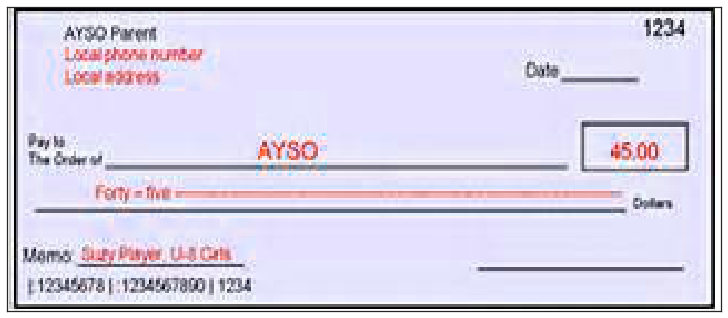

In [9]:
display_image(data[5])

# The Curse Of Dimensionality

The first thing that you notice is that you have many many features: to be precise, $322 x 137 x 3 = 136452$ of them. This is a lot of features! Having too many features can lead to overfitting.

Here we'll continue to focus on PCA. We'll reduce our dimensionality from 136452 to 60. We choose 60 as a large apriori number: we dont know if the variation in the data will have gone below a reasonable threshold by then. Notice that we use fit_transform in the sklearn API which takes the original 87 rows x 136452 columns dimensional data data and transforms it to a 87 x 60 data matrix X.

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60)
X = pca.fit_transform(data)

In [11]:
print pca.explained_variance_ratio_.sum()

0.942497746521


The explained variance ratio pca.explained_variance_ratio_ tells us how much of the variation in the features is explained by these 60 features. When we sum it up over the features, we see that 94% is explained: good enough to go down to a 60 dimensional space from a 136452 dimensional one!

We can see the individual variances as we increase the dimensionality:

In [14]:
pca.explained_variance_ratio_*100          #according to 65

array([ 35.92596698,   6.29318801,   4.10778347,   3.11950952,
         2.81695972,   2.28831619,   2.10127948,   1.87404975,
         1.73264637,   1.53023772,   1.42159668,   1.31839394,
         1.2470149 ,   1.16381831,   1.09958304,   1.06073084,
         1.00742996,   0.98023829,   0.96055727,   0.91535688,
         0.90185559,   0.85212983,   0.83674468,   0.79691805,
         0.75489391,   0.72504979,   0.70821364,   0.67967108,
         0.66088277,   0.64771325,   0.62737185,   0.59475711,
         0.58299965,   0.574474  ,   0.57274963,   0.55258459,
         0.5385224 ,   0.53337321,   0.51661337,   0.49334696,
         0.48572341,   0.47752627,   0.47270073,   0.45617262,
         0.44391473,   0.43970682,   0.4343624 ,   0.42788941,
         0.42185021,   0.40970838,   0.40508845,   0.39340359,
         0.38806097,   0.38286556,   0.37886323,   0.36290754,
         0.35882033,   0.34794539,   0.34018029,   0.33314238,
         0.32687892,   0.31967522,   0.31392095,   0.30

The first dimension accounts for 35% of the variation, the second 6%, and it goes steadily down from there.

Let us create a dataframe with these 60 features labelled pc1,pc2...,pc60 and the labels of the sample:

In [15]:
df = pd.DataFrame({"y":y, "label":np.where(y==1, "check", "dollar")})
for i in range(pca.explained_variance_ratio_.shape[0]):
    df["pc%i" % (i+1)] = X[:,i]
df.head()

,label,y,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,pc41,pc42,pc43,pc44,pc45,pc46,pc47,pc48,pc49,pc50,pc51,pc52,pc53,pc54,pc55,pc56,pc57,pc58,pc59,pc60,pc61,pc62,pc63,pc64,pc65
0,check,1,-22536.362571,-2428.343915,-2133.777326,-328.325353,-1065.240219,79.782023,-425.014818,622.493339,-2490.221292,-858.613680,-1072.653838,277.073031,-1117.107505,713.019647,-787.265249,415.332156,-195.850445,472.257718,-430.188504,-609.123571,-588.560947,-266.921279,-986.933015,952.372268,1038.657058,569.540745,-45.142205,-110.896290,-522.357838,543.060769,-643.236220,83.854621,-739.922691,1267.468341,-564.536048,-109.965610,504.029425,292.414960,-259.802483,50.625787,-463.895457,744.944834,532.271996,-446.181713,467.284563,-232.726912,-94.727393,279.395796,616.643725,-504.016763,-472.124635,108.331258,409.582110,-171.375377,-133.945377,-504.681228,18.788585,-84.475316,-175.502368,-19.403194,535.465275,725.053948,-321.683696,-583.033042,-2008.102024
1,check,1,-22226.658684,-709.255710,-288.827076,-1300.634463,-792.090635,217.466068,1076.765059,-2115.129981,-875.492021,-1124.767839,-343.228488,-43.594020,548.318606,357.461280,-1761.816343,-372.530702,813.526268,294.355307,-940.686690,154.139228,-1122.728262,509.726201,-815.294647,719.265914,290.107301,-114.031267,813.945379,1145.265781,-363.144885,116.172130,-857.837632,592.516357,315.483507,181.787380,-669.048190,-634.399033,-109.613509,-198.555320,-139.536152,-400.849894,166.088622,8.502665,728.138761,9.332886,286.300180,31.400807,-75.836345,337.051921,-1091.264492,261.356736,-377.478433,-161.270747,108.762151,351.028466,531.061854,-418.707513,77.775524,35.791960,-66.236723,318.696603,256.945736,225.411077,-588.132096,-516.165594,-1692.299835
2,check,1,-17364.260784,-4252.027183,793.801776,-1362.053153,-374.221452,3142.097080,2514.253495,1443.866759,-121.030663,-419.704739,-2083.267093,1717.746567,-723.757082,-1240.652872,-311.492168,-1060.257048,1384.770828,-800.242767,-2597.715680,-880.939846,3383.465085,-389.563559,-3413.887113,1345.039492,-4752.823793,1034.058907,2200.202919,-689.196146,1386.255129,-2149.056248,-650.240946,1688.604248,1791.364564,-3118.920807,-919.993845,2243.284229,-3118.949888,3048.560228,835.896136,274.654144,1749.593530,-3143.818788,3729.541736,1484.800859,901.213366,671.956494,-618.105748,-1301.411103,87.034768,-2939.878883,-2409.023222,-1959.678890,936.594335,-1937.613215,-1142.097115,-2261.111640,-989.165511,-464.016762,-1352.983283,-969.346824,-1419.042613,-473.776153,1106.937433,-591.796059,88.866220
3,check,1,-22847.256200,-900.591716,577.205103,-180.326187,-733.166261,-107.929020,1441.820889,-1069.825246,844.933929,-1390.318849,1470.684935,-723.962324,-578.792109,-258.829551,935.495152,174.784706,-299.197130,870.739985,-185.642635,1241.246370,560.013367,-178.137034,-331.161030,-386.711889,-937.361326,186.381222,1310.359931,99.986931,-290.676588,-468.986607,-150.002682,-86.539531,53.394710,821.566570,-171.463539,646.050563,440.801811,304.070793,109.227026,-254.318382,1382.213861,-821.369532,-1098.478625,575.767868,546.374626,-495.541262,-758.255122,-351.933765,931.485033,-1711.989533,44.956552,66.763346,138.418449,-521.385246,187.033337,289.558205,37.977053,-230.835672,597.395881,-43.409799,-614.029478,4.986457,-283.269749,-77.688548,-417.710748
4,check,1,-15868.672595,3259.491415,506.802798,-919.640950,2166.545061,-981.656568,-1669.683274,-391.351553,1735.671683,163.523316,-1626.726018,-555.705429,-863.185195,1721.432636,944.551447,-1132.536763,2139.011788,767.233262,-1095.756959,604.321843,-29.341869,79.786430,-505.917640,1106.222648,328.175742,-1231.665829,-709.993372,-710.813338,-144.188329,-907.803741,1026.326155,-3636.755058,2099.031574,-3353.074209,-1026.660398,-2142.854382,1870.767617,2165.844029,2538.898251,-429.759715,53.684519,1348.428172,1271.039433,-1312.733040,-193.292089,-959.514420,393.770669,827.069064

In [17]:
df.shape

(87, 67)

Lets see what these principal components look like:

In [18]:
def normit(a):
    a=(a - a.min())/(a.max() -a.min())
    a=a*256
    return np.round(a)
def getNC(pc, j):
    size=322*137*3
    r=pc.components_[j][0:size:3]
    g=pc.components_[j][1:size:3]
    b=pc.components_[j][2:size:3]
    r=normit(r)
    g=normit(g)
    b=normit(b)
    return r,g,b
def display_component(pc, j):
    r,g,b = getNC(pc,j)
    rgbArray = np.zeros((137,322,3), 'uint8')
    rgbArray[..., 0] = r.reshape(137,322)
    rgbArray[..., 1] = g.reshape(137,322)
    rgbArray[..., 2] = b.reshape(137,322)
    plt.imshow(rgbArray)
    plt.xticks([])
    plt.yticks([])

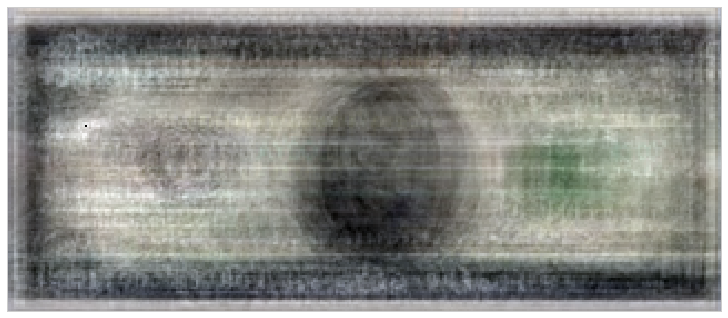

In [19]:
display_component(pca,0)

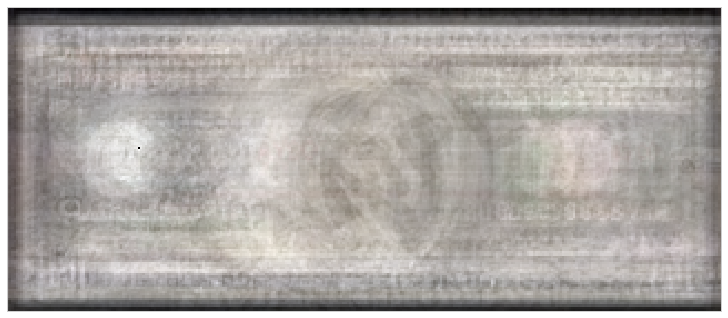

In [20]:
display_component(pca,1)

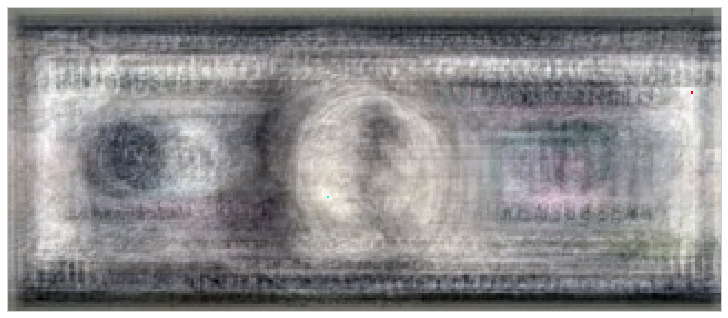

In [21]:
display_component(pca,2)

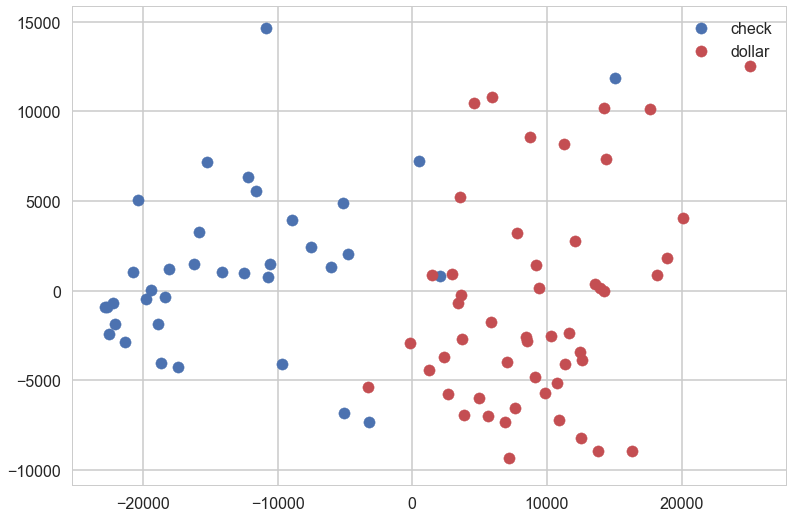

In [22]:
colors = [c0, c2]
for label, color in zip(df['label'].unique(), colors):
    mask = df['label']==label
    plt.scatter(df[mask]['pc1'], df[mask]['pc2'], c=color, label=label)
plt.legend()

You might be a bit confused: we needed to use 65 components to explain 95% of the variation in the features, but only 1 or 2 components to separate checks from dollars? This is because PCA is unsupervised: the only variation we are explaining is the variation in the 136452 dimensional feature space. We are not explaining the variation in the $y$ or the label, and it might turn out, as it does in this case, that with the additional information in $y$, the dimensionality needed for classification is much lower.

We could thus choose just the first few principal components to make our classifier. For the purposes of this lab, since two components can be easily visualized (even though adding some fore features may leads to better separability), we'll go with learning a 2-dimensional classifier in the pc1 and pc2 dimensions! [^By the way, there is a problem with pre-doing feature selection before doing cross-validation. Ideally one should be doing the feature selection separately in each fold. The reasons for this is basically that there is a high probability that a feature correlates strongly with $y$ just by chance, if there are so many features. How to do this properly will become clear in the homework.]

# Classifying in a reduced feature space with kNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
ys=df['y'].astype(int).values
subdf=df[['pc1','pc2']]
subdfstd=(subdf - subdf.mean())/subdf.std()
Xs=subdfstd.values
def classify(X, y, nbrs, plotit=True, train_size=0.6):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf= KNeighborsClassifier(nbrs)
    clf=clf.fit(Xtrain, ytrain)
    #in sklearn accuracy can be found by using "score". It predicts and then gets the accuracy
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    Xall=np.concatenate((Xtrain, Xtest))
    if plotit:
        print "Accuracy on training data: %0.2f" % (training_accuracy)
        print "Accuracy on test data:     %0.2f" % (test_accuracy)
        plt.figure()
        ax=plt.gca()
        points_plot(ax, Xtrain, Xtest, ytrain, ytest, clf, alpha=0.3, psize=20)
    return nbrs, training_accuracy, test_accuracy

C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Accuracy on training data: 1.00
Accuracy on test data:     0.91


(1, 1.0, 0.91428571428571426)

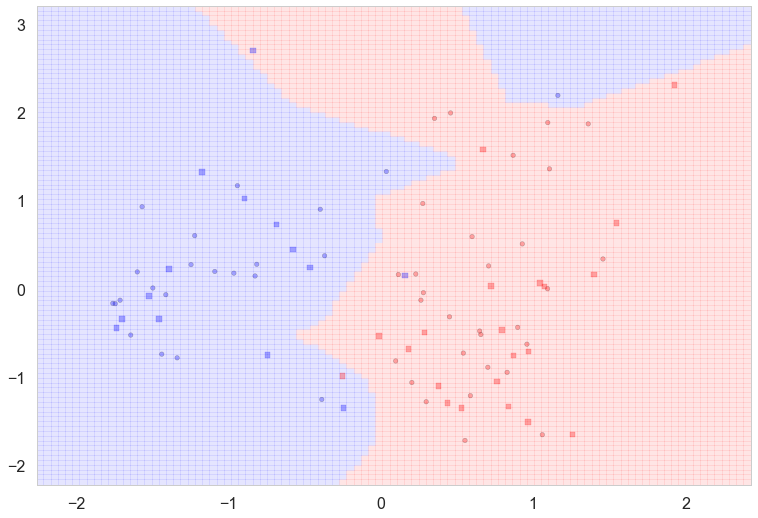

In [25]:
classify(Xs,ys,1)

Accuracy on training data: 0.60
Accuracy on test data:     0.57


(50, 0.59615384615384615, 0.5714285714285714)

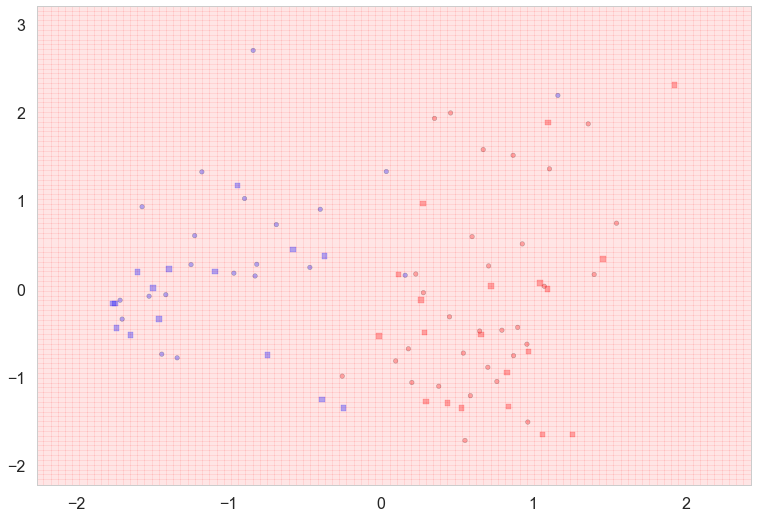

In [26]:
classify(Xs,ys,50)#run this a few times

Accuracy on training data: 0.60
Accuracy on test data:     0.57


(50, 0.59615384615384615, 0.5714285714285714)

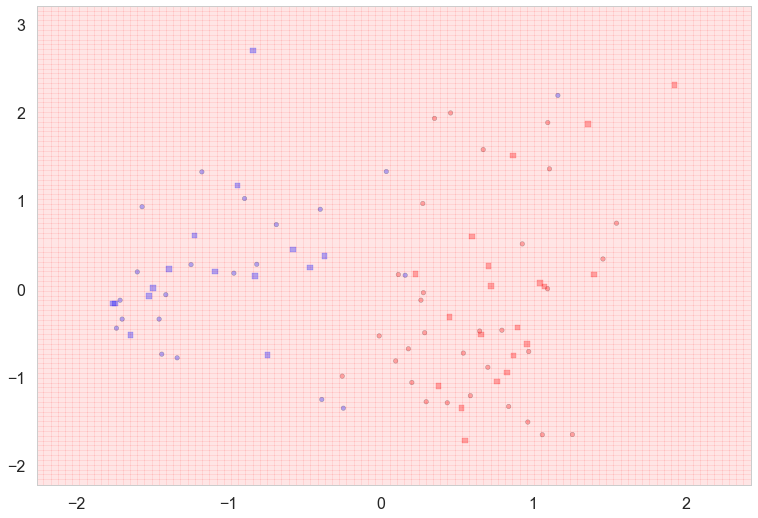

In [27]:
classify(Xs,ys,50)#run this a few times

# Error against complexity (k), and cross-validation
To find the balance between the high bias (large $k$) case and the high variance (low $k$) case, and once again we turn to our error vs complexity curve to find the appropriate $k$,

In [28]:
fits={}
for k in np.arange(1,45,1):
    fits[k]=[]
    for i in range(200):
        fits[k].append(classify(Xs, ys,k, False))
nbrs=np.arange(1,45,1)
fmeanstr = np.array([1.-np.mean([t[1] for t in fits[e]]) for e in nbrs])
fmeanste = np.array([1.-np.mean([t[2] for t in fits[e]]) for e in nbrs])
fstdsstr = np.array([np.std([t[1] for t in fits[e]]) for e in nbrs])
fstdsste = np.array([np.std([t[2] for t in fits[e]]) for e in nbrs])

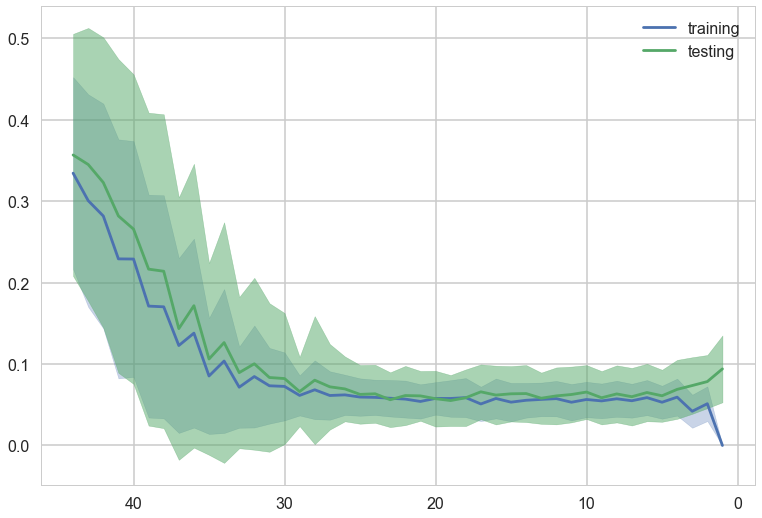

In [29]:
plt.gca().invert_xaxis()
plt.plot(nbrs, fmeanstr, color=c0, label="training");
plt.fill_between(nbrs, fmeanstr - fstdsstr, fmeanstr+fstdsstr, color=c0, alpha=0.3)
plt.plot(nbrs, fmeanste, color=c1, label="testing");
plt.fill_between(nbrs, fmeanste - fstdsste, fmeanste+fstdsste, color=c1, alpha=0.5)

plt.legend();

Once again, as before, we plot the test error and training errors against the number of neighbors $k$ . Here $k$ serves as a complexity parameter, with small $k$ being more "wiggly" in the classification of neighborhoods and large $k$ oversmoothing the classification. Notice that we plot $k$ reversed on the x-axis so as to go from lower complexity to higher complexity. As expected, the training error drops with complexity, but the test error starts going back up. There is a large range of $k$ from 25 to 5, in which the fit is as good as it gets!

# Setting up some code

Lets make a small diversion, though, and set some code up for classification using cross-validation so that we can easily run classification models in scikit-learn. We first set up a function cv_optimize which takes a classifier clf, a grid of hyperparameters (such as a complexity parameter or regularization parameter as in the last ) implemented as a dictionary parameters, a training set (as a samples x features array) Xtrain, and a set of labels ytrain. The code takes the traning set, splits it into n_folds parts, sets up n_folds folds, and carries out a cross-validation by splitting the training set into a training and validation section for each foldfor us. It prints the best value of the parameters, and retuens the best classifier to us.

In [34]:
from sklearn.model_selection import GridSearchCV
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print "BEST PARAMS", gs.best_params_
    best = gs.best_estimator_
    return best

We then use this best classifier to fit the entire training set. This is done inside the do_classify function which takes a dataframe indf as input. It takes the columns in the list featurenames as the features used to train the classifier. The column targetname sets the target. The classification is done by setting those samples for which targetname has value target1val to the value 1, and all others to 0. We split the dataframe into 80% training and 20% testing by default, standardizing the dataset if desired. (Standardizing a data set involves scaling the data so that it has 0 mean and is described in units of its standard deviation. We then train the model on the training set using cross-validation. Having obtained the best classifier using cv_optimize, we retrain on the entire training set and calculate the training and testing accuracy, which we print. We return the split data and the trained classifier.

In [35]:
from sklearn.cross_validation import train_test_split
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.8):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    return clf, Xtrain, ytrain, Xtest, ytest

# As before, cross-validation

Lets repeat what we have been doing so far and carry out a cross-validation. We're of-course now training on an even smaller set, so our results will be a bit different from the diagram above. We plot the results in the diagram below. The results are fairly stable and correspond to our intuition that the first principal component basically separates the data.

In [36]:
bestcv, Xtrain, ytrain, Xtest, ytest = do_classify(KNeighborsClassifier(), {"n_neighbors": range(1,40,2)}, df, ['pc1','pc2'],
                                                   'label', 'check' )

BEST PARAMS {'n_neighbors': 3}
Accuracy on training data: 0.96
Accuracy on test data:     0.94


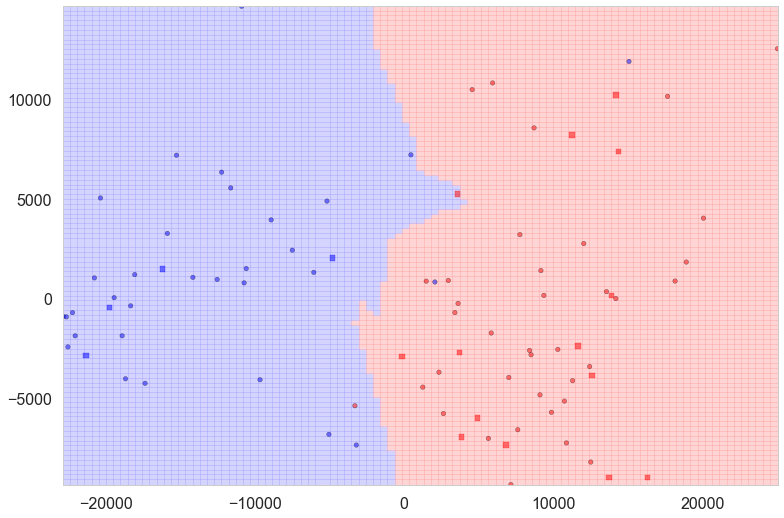

In [37]:
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain, Xtest, ytrain, ytest, bestcv, alpha=0.5, psize=20);

We can plot the probability contours as well: the probability is easily obtained by just counting the fraction of neighbors that are blue or red.

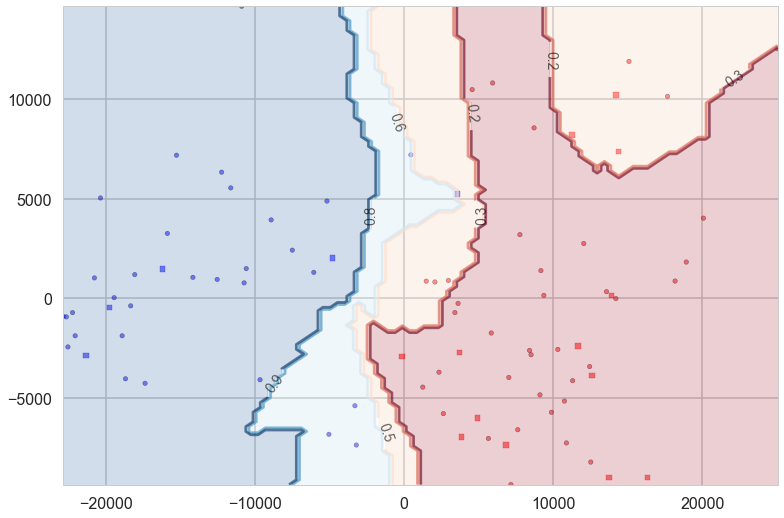

In [38]:
plt.figure()
ax=plt.gca()
points_plot_prob(ax, Xtrain, Xtest, ytrain, ytest, bestcv, alpha=0.5, psize=20);

In [39]:
#Evaluation

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(ytest, bestcv.predict(Xtest), )

array([[13,  1],
       [ 0,  4]])

# Logistic Regression